# Machine Learning & Statistics Project 2019

## Declan Reidy G00364690

### November 2019

In [1]:
import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_boston

%matplotlib inline

Using TensorFlow backend.


This project concerns the well-known Boston House Prices dataset. The project in this Jupyter Notebook is my attempt to describe the dataset firstly with descriptive statistics, then inferential statistics and finally build a neural network to accurately predict the target variable of the dataset, the median house price.

Intitially we will walk through loading the dataset and confirming we are working on the correct dataset. Quickly we will move on to Section 1 describing the dataset by understanding the distribution of the median house price and use some descriptive statistics as well as a correlation matrix to idenify which variables have the greatest correlation to our target variable. We will use the results of the correlation matrix to plot the distributions of the most heavily correlated variables. Performing a linear regression on each variable will aid in confirming by visualisation that each variable is heavily correlated to the target variable. For completeness we will confirm that the others are not.

Section 2 we will use inferential statistics to analyse the dataset. Firstly we will look at locations next to Charles river versus those that are not. Then using the 3 feature variables of strongest correlation to the target variable indicated in Section 1 we can perform an ANOVA to analyse the median house price.


Finally in Section 3 we can build, train and tune our neural network to predict the median house price of the different areas and compare this to the data we hold in the target variable.



# Getting started
## Validate the dataset

In [2]:
#Set parameters for all displays within the notebook

plt.rcParams['figure.figsize'] = (10, 10)
sns.set(rc={'figure.figsize':(10,10)})


Importing the Boston House Prices dataset into Jupyter notebook from scikit-learn library. Note this comes in with the target variable separate. Simply printing out the feature variable set will not be enough to validate what we need so we'll seek to print out the target variable and print it in the same dataframe.

In [3]:
boston_dataset = load_boston()

#check out the keys of the dataset so we can build our pandas dataframe
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Print a preview of the dataset to ensure it is as expected. Note that median house price value is not included under feature names as it is the target variable.

In [4]:
#check out the data section and note the target variable is missing as suspected
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Verify that 'target' key is in fact the target variable that we expect.

In [5]:
#Check if the target variable Median Value MEDV is represented by target as suspected.
boston['MEDV'] = boston_dataset.target
boston['MEDV'].head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64



Append the target variable to our dataframe to allow easier comparisons later.

In [6]:
#Using the assign function add the target variable to our dataframe.
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston = boston.assign(MEDV = boston_dataset.target)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Verify that the dataset matches that from our back up csv file 'Boston House Prices'

In [7]:
#Compare with our CSV dataset and display the first 5 rows of the dataset.

df = pd.read_csv("BostonHousePrices.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



# Section 1
## Describe the dataset

A good place to start is by describing the dataset and getting some descriptive statistics. Transposing the dataframe will make it more readable. We can see all 506 entries are present in the dataset to begin with. We can see the max median house price has been capped to 50, or $50,000. At this point we can confirm the suspicion that the housing market from 1978 is not reflective of that which we experience today, but we can assume the dataset is still statistically relevant.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Descriptive statistics will only bring us some of the way to finding what variables are important. Next we can put the target variable data into a distribution plot to check it's distribution. We can see below that it is normally distributed.

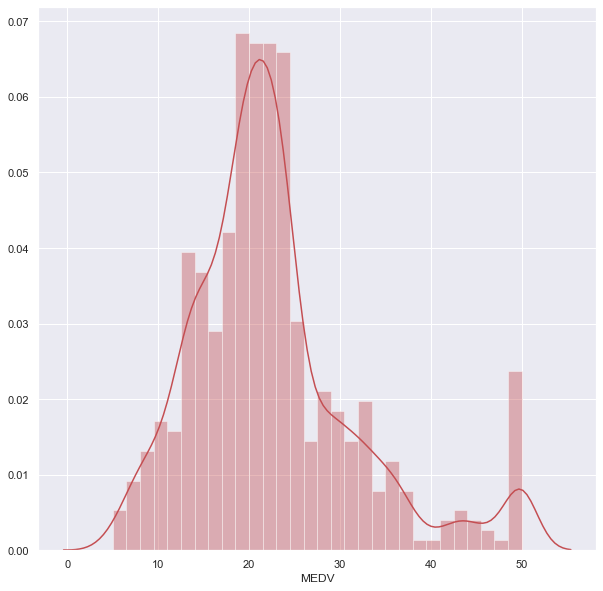

In [9]:

#Shows normal distribution more or less
sns.distplot(boston['MEDV'], bins=30,color="r")

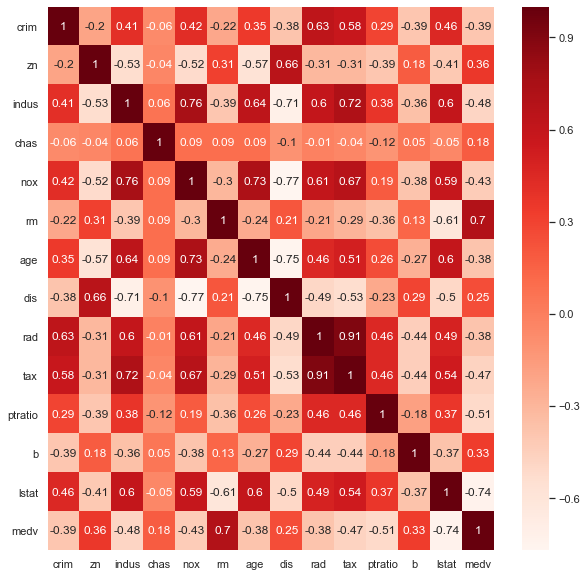

In [10]:
#check which variables are correlated to MEDV positively or negatively.
correlation_matrix = df.corr().round(2) #tidy up the output
sns.heatmap(data=correlation_matrix,annot=True,cmap="Reds")
plt.yticks(rotation=0) #rotate the labels for y to make them readable

# fix for bug that cuts off top/bottom of seaborn plot
#https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Using a correlation matrix and plotting using a heatmap we can see the strongest positive correlation between the median value of the property (MEDV) is the number of rooms (RM) at 0.7. The strongest negative correlation is between MEDV and the percentage of lower status of the population (LSTAT) at -0.74. We can also note that the student to teacher ratio (PTRATIO) is the only other feature variable above +/-0.5, at -0.51.

We should use feature variables which correlate as strongly as possible to the target variable for Linear regression modelling. 

When training our network later we should check for multi-co-linearity and avoid using pairs strongly correlated to each other. Examples of a positively correlated pair (0.91) is Index of accessibility to radial highways (RAD) and Full-value property tax rate per $10,000 (TAX). Similarly an example of a negatively correlated pair (-0.75) is Weighted distances to five Boston employment centers (DIS) and Proportion of owner-occupied units built prior to 1940 (AGE) 

Next we can look at selected feature variables in isolation and confirm strong correlations for later in the analysis.

In [11]:
feature_var = ['rm', 'ptratio', 'lstat','medv']
df[feature_var].corr().round(2)

,rm,ptratio,lstat,medv
rm,1.00,-0.36,-0.61,0.70
ptratio,-0.36,1.00,0.37,-0.51
lstat,-0.61,0.37,1.00,-0.74
medv,0.70,-0.51,-0.74,1.00


Checking the distribution of the most heavily correlated feature variables confirms that they are RM and LSTAT are very much normally distributed whilst the 

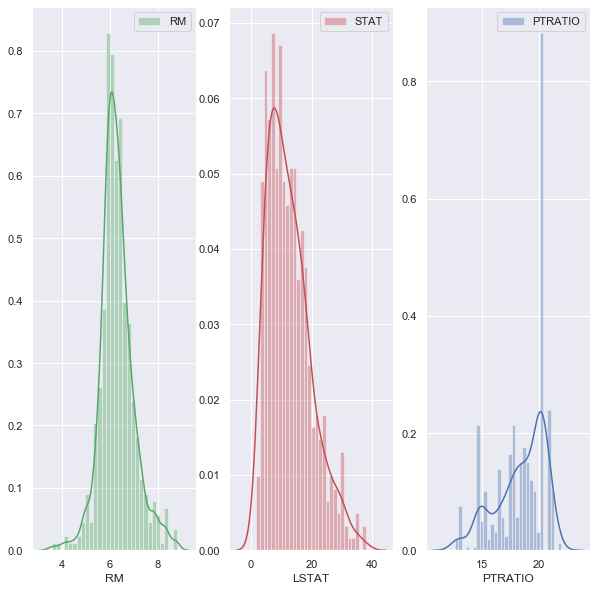

In [12]:
fig, ax = plt.subplots(1, 3)
#t = ax[0]=plt.hist([boston['MEDV'],boston['RM'],boston['LSTAT'],boston['PTRATIO']], bins=30, color=["r","k","g","b"], label=["MEDV","RM","LSTAT","PTRATIO"])
#t.legend()
r = sns.distplot(boston['RM'], bins=30, color="g", ax=ax[0], label=["RM"])
r.legend()
l= sns.distplot(boston['LSTAT'], bins=30, color="r", ax=ax[1], label=["STAT"])
l.legend()
l= sns.distplot(boston['PTRATIO'], bins=30, color="b", ax=ax[2], label=['PTRATIO'])
l.legend()

Moving forward it is a logical assumption we must use average number of rooms (rm) and percentage of lower status of the population (lstat) as part of our neural network to best approximate the median house price. The third feature variable of student to teacher ratio also appears to be normally distributed but we can be far less conclusive about that.

Let's look at the descriptive statistics of the dataset again but only for our three feature variables that look the most promising by way of their correlation.

In [13]:

#Select feature variables based on correlation above
feature_var = ['rm', 'lstat', 'ptratio', 'medv'] #take out similar rad/tax, dis/age
df[feature_var].describe().T


,count,mean,std,min,25%,50%,75%,max
rm,506.0,6.284634,0.702617,3.561,5.8855,6.2085,6.6235,8.78
lstat,506.0,12.653063,7.141062,1.730,6.9500,11.3600,16.9550,37.97
ptratio,506.0,18.455534,2.164946,12.600,17.4000,19.0500,20.2000,22.00
medv,506.0,22.532806,9.197104,5.000,17.0250,21.2000,25.0000,50.00


We can also isolate these variables from our correlation matrix and show in a more explicit way the correlation between the 3 feature variables and the median house price.

In [14]:
#Now just correlate the chosen variables (large numbers show high correlation)
df[feature_var].corr()

,rm,lstat,ptratio,medv
rm,1.000000,-0.613808,-0.355501,0.695360
lstat,-0.613808,1.000000,0.374044,-0.737663
ptratio,-0.355501,0.374044,1.000000,-0.507787
medv,0.695360,-0.737663,-0.507787,1.000000


If we were to then plot these three variables using a pair plot we can see we have found highly correlated variables. This is a promising sign for later in our project.

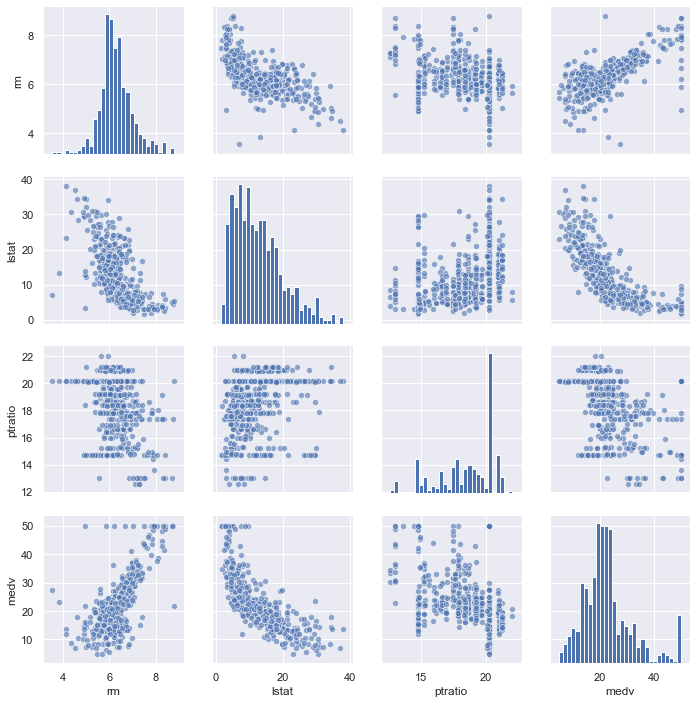

In [15]:
#pair plotting the feature variables
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(df[feature_var], plot_kws={'alpha':0.6}, diag_kws={'bins':30})

Based on the pair plot we can again see that the two most promising linear correlations are RM and LSTAT. For some context it does appear likely that the number of rooms would be positively correlated to the median price of the house. Similarly, it seems logical given what we empirically know now about those of the same socio economic groups tending towards one another, that LSTAT would be inversely correlated to the median house price. Finally, it is also logical that PRATIO would be positively correlated given the weight it is likely to be given by prospective buyers in any era.

Let's plot the three feature variables separately with regression lines to further validate the 3 (or more) variables with the best fit. As we can see from the chosen three variables the data points are clustered close to the regression line. We can take this opportunity to plot each of the variables (not CHAS as it is binary), just to assure ourselves of no hidden positive correlations.

Plotting regression lines for Number of Rooms 'RM' , Percentage Lower Status 'LSTAT' and Pupil to Teacher ratio 'PRATIO'

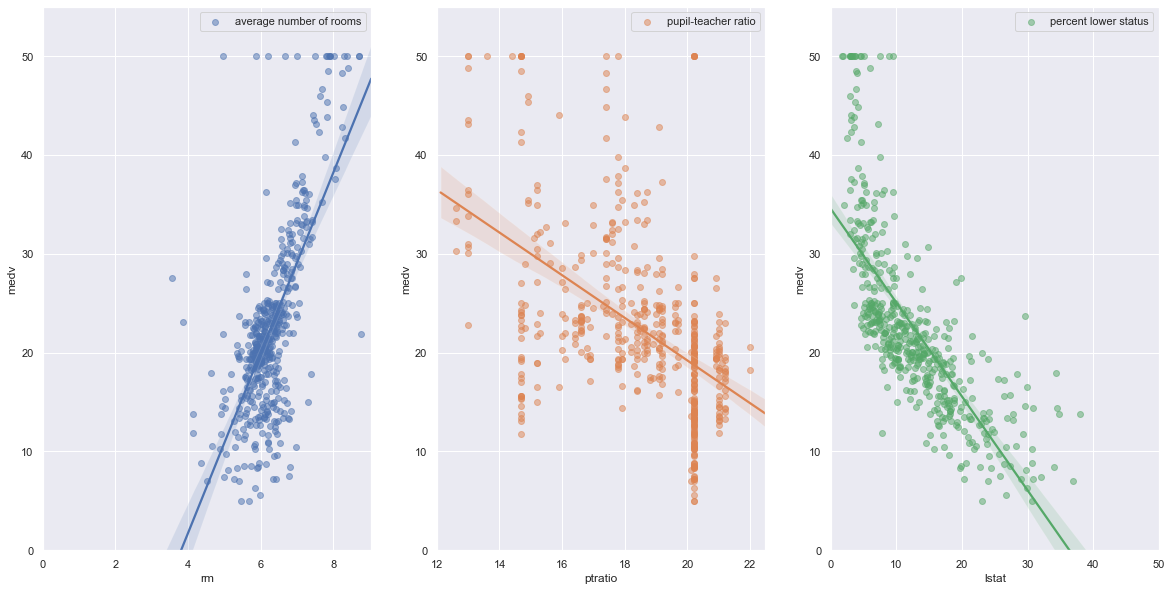

In [16]:
#Use Seaborn instead of matplotlib for best fit line 
#https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)

rm = sns.regplot('rm', 'medv', df, ax=ax[0], label='average number of rooms', scatter_kws={'alpha': 0.5})
rm.set(ylim=(0, 55))
rm.set(xlim=(0, None))
rm.legend()

ptr = sns.regplot('ptratio', 'medv', df, ax=ax[1], label='pupil-teacher ratio', scatter_kws={'alpha': 0.5})
ptr.set(ylim=(0, 55))
ptr.set(xlim=(12, None))
ptr.legend()

lst = sns.regplot('lstat', 'medv', df, ax=ax[2], label='percent lower status', scatter_kws={'alpha': 0.5})
lst.set(ylim=(0, 55))
lst.set(xlim=(0, 50))
lst.legend()



Plotting regression lines for Crime rate 'CRIM' , Residential zoning 'ZN' and Age of the property 'AGE'

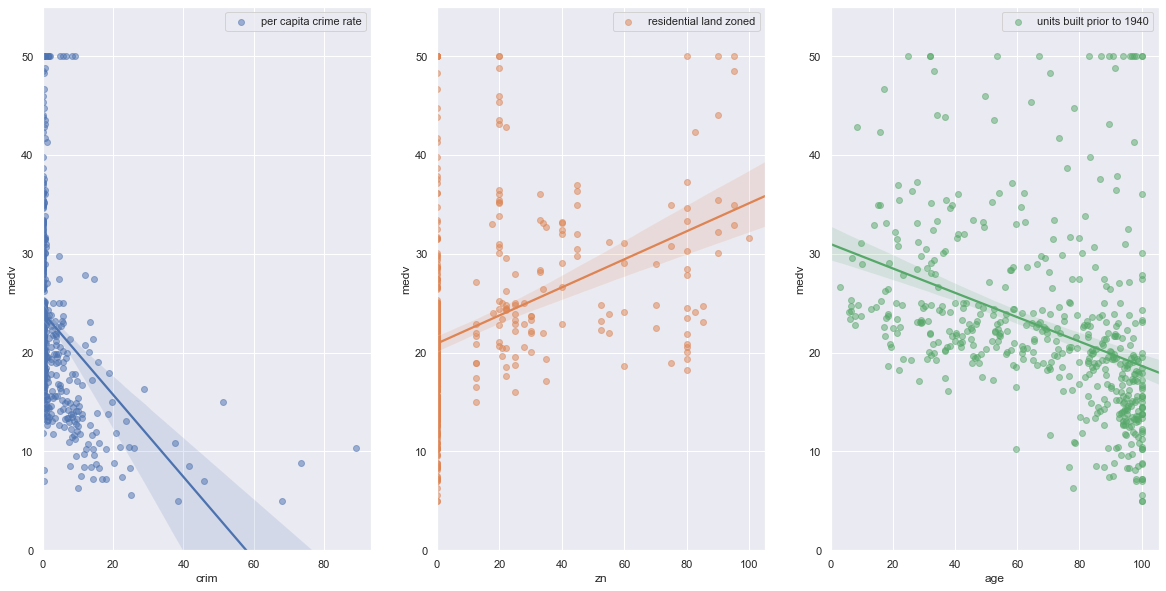

In [17]:
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)

crim = sns.regplot('crim', 'medv', df, ax=ax[0], label='per capita crime rate', scatter_kws={'alpha': 0.5})
crim.set(ylim=(0, 55))
crim.set(xlim=(0, None))
crim.legend()

zn = sns.regplot('zn', 'medv', df, ax=ax[1], label='residential land zoned', scatter_kws={'alpha': 0.5})
zn.set(ylim=(0, 55))
zn.set(xlim=(0, None))
zn.legend()

age = sns.regplot('age', 'medv', df, ax=ax[2], label='units built prior to 1940', scatter_kws={'alpha': 0.5})
age.set(ylim=(0, 55))
age.set(xlim=(0, None))
age.legend()





Plotting regression lines for Distance to employment centres 'DIS' , Accesibility to radial highways 'RAD' and property tax rates 'TAX'

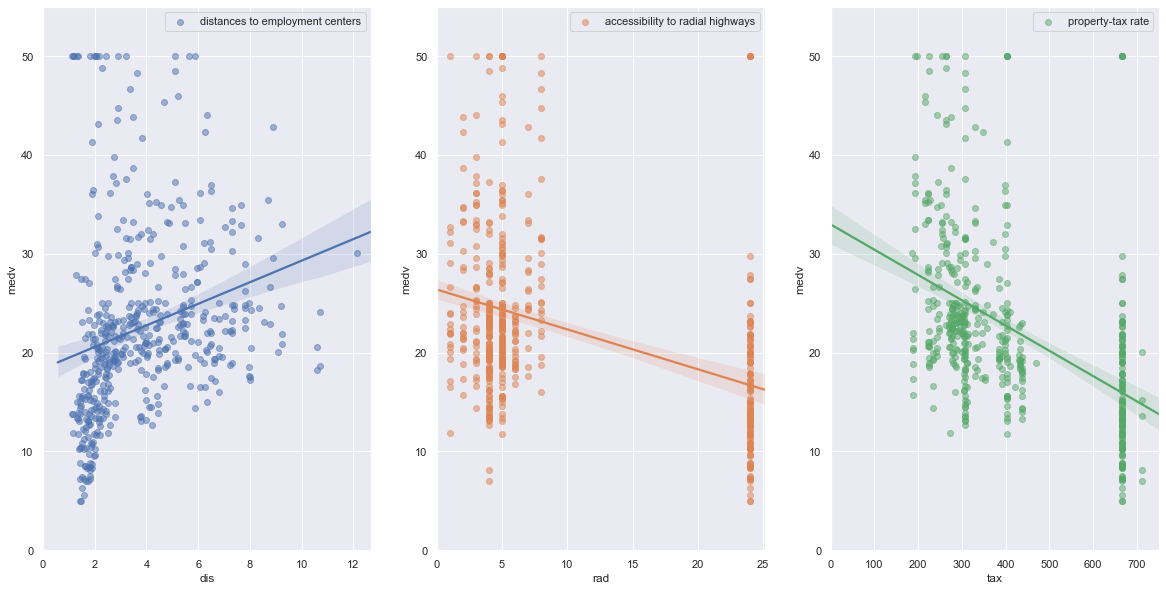

In [18]:
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)

dis = sns.regplot('dis', 'medv', df, ax=ax[0], label='distances to employment centers', scatter_kws={'alpha': 0.5})
dis.set(ylim=(0, 55))
dis.set(xlim=(0, None))
dis.legend()

rad = sns.regplot('rad', 'medv', df, ax=ax[1], label='accessibility to radial highways', scatter_kws={'alpha': 0.5})
rad.set(ylim=(0, 55))
rad.set(xlim=(0, None))
rad.legend()

tax = sns.regplot('tax', 'medv', df, ax=ax[2], label='property-tax rate', scatter_kws={'alpha': 0.5})
tax.set(ylim=(0, 55))
tax.set(xlim=(0, None))
tax.legend()



We can validate from the above that the regression lines for six of our feature variables do not indicate correlation with the target variable and thus the three feature variables we are looking at more closely 'RM' , 'LSTAT' and 'PRATIO' have the best fit of all and should remain the focus of our concentration.

# Section 2
## Charles River compared to non Charles River

In Section 2 we will use inferential statistics to anaylse the dataset. The aim of the section is to determine whether there is a material difference in the median house price for the areas on the Charles river in Boston and those that are not on the river. The starting point for this is to isolate the houses on the Charles river from those not on the Charles river. Using the feature variable CHAS we can determine from 0 or 1 whether a house is on the river or not. 

Below is the description of the sub dataframe for Charles river 'CR'  and the Non Charles river 'NCR'

In [20]:
#Charles River stats
CR = df['medv'][df['chas'] == 1]
CR.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: medv, dtype: float64

In [21]:
#Non Charles River stats
NCR = df['medv'][df['chas'] == 0]
NCR.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: medv, dtype: float64

We can see from the descriptive statistics that the mean house price is higher by the river 28.44, than compared with away from the river 22.09. The median house price however is slightly closer with 23.3 on the river and 20.9 away from the river. The count of the NCR locations in comparison to the CR locations is overwhelming in terms of magnitude. The standard deviation is higher for the CR locations and potentially hiding a trend in the data that is not immediately obvious. This is very unlikely given the min, lower quartile, median, upper quartile and max all indicate a higher median house price in the CR versus the NCR.

Plotting the data as a combined boxplot/swarm plot below gives an indication of what we expect to see from our inferential statisitcs. While there are fewer locations classified as CR versus NCR we can see from the plot that there is heavy concentration around the median and within the 25% to 75% quartiles to indicate the data is not skewed by the locations capped at $50,000.

Plotting NCR and CR side by side we can see the difference in the median is not enormously sigificant but nonetheless for house prices between approximately $5,000 and $50,000 a median difference of $2,400 between the CR and NCR is statistically significant.

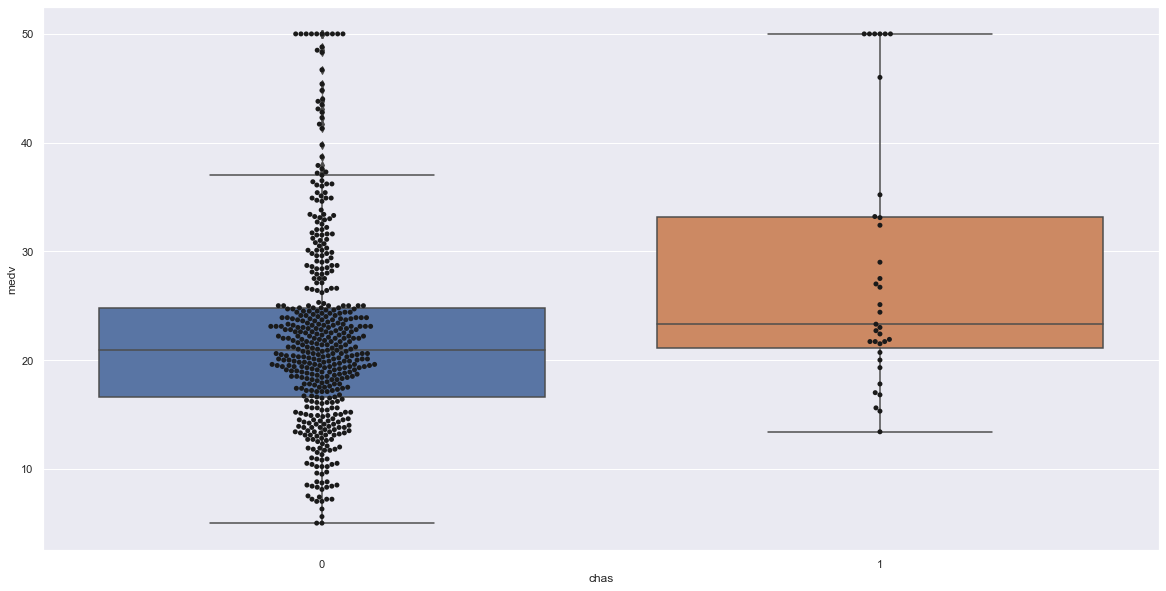

In [22]:
sns.boxplot(x="chas",y="medv",data=df).set(xlabel='Charles River (0 Not on River / 1 on River)', ylabel='Median House Value (000k)')
sns.swarmplot(x="chas",y="medv",data=df,color='k')
plt.show()

## Test using a basic Analysis of Variance (ANOVA) set up

A standard T-test is a useful form of inferential statistical analysis, but given the opportunity to use multiple variables a simple T-test has limitations. If we define the null hypothesis as the hypothesis that no significant or observable difference exists between different populations other than sampling or experimental error, and the null hypothesis is true, then the probality of not obtaining a significant result over multiple tests will increase significantly with any increase in the number of tests

For this reason we will use an ANOVA to conduct the inferential section of our analysis. An ANOVA will compare all means simultaneously and therefore keep the risk of not obtaining a significant result constant with any increase in the number of tests.



For NULL
T-- (or closer to 0) more likely there is no significant difference
P++ greater P is closest to the mean and thus represents evidence of there being no statistical difference.

We will continue to group the locations as CR and NCR. In conducting an ANOVA we will get a F-statistic and a P-value. 

The F-statistic is the measure of variance between groups divided by the variance of the group itself. The higher the F-statistic the more likely there is a significant statistical difference between the two groups and evidence agains the NULL hypothesis. 

The P-value will help us determine if the null hypothesis should be rejected or not, eg. we expect to reject it based on our descriptive statistics as we believe a significant difference exists. A P-value of less than 0.05 (5%) should indicate we have a strong likelihood of correctly rejecting the null hypothesis. Similarly, a lower p-value may occur as a result of high F-statistic given the distribution is also a bell curve. Further evidence against the null hypothesis.

In [23]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]

In [24]:
stats.f_oneway(CR["medv"], NCR["medv"])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

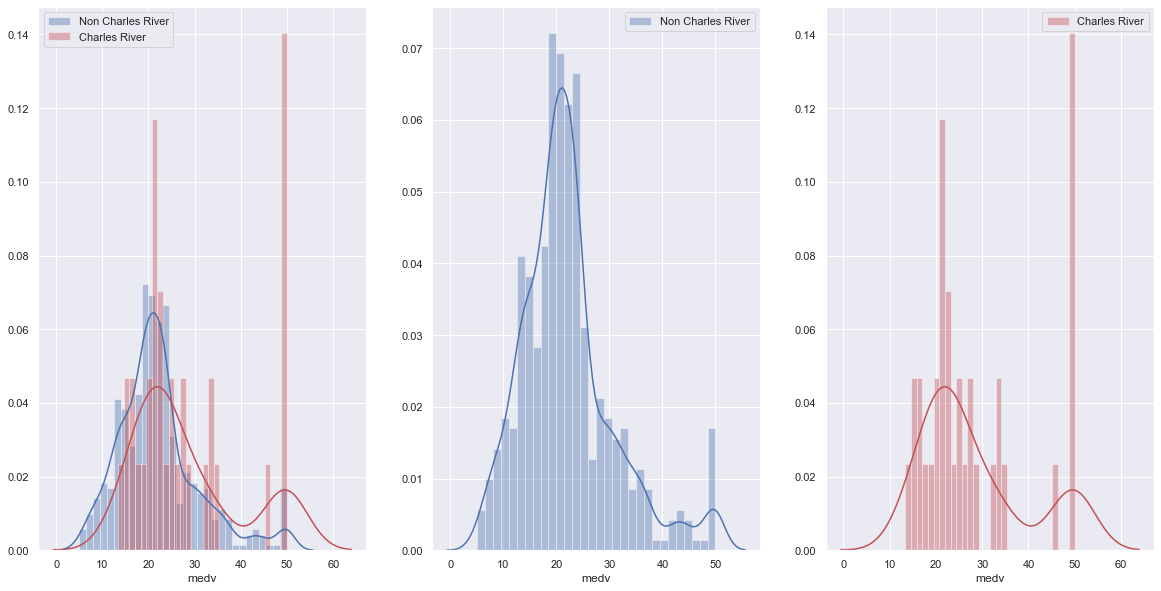

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['medv'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['medv'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['medv'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['medv'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

In [26]:
#stats.f_oneway(df['medv'][df['chas'] == 0],df['medv'][df['chas'] == 1])

In [27]:
#stats.f_oneway(df['medv'][df['chas'] == 0],df['medv'][df['chas'] == 1])

Analysing the ANOVA variance result using a different methodology validates the original findings. 

F-statistic 15.971
P-value 7.390 x 10^-5

As previously outlined the null hypothesis in an ANOVA states that there is no signifcant difference between the means of both sets of data, outside of sampling or experimental error. In the case of our results, the p-value of 0.00007390 indicates that there is only an extremely remote chance of the two sets of data satisfying the null hypothesis and that the different locations situated on the Charles river and those situated away from it provide statistically different median house prices.

### Expanding the analysis to other criteria

We have determined with some confidence that the median house price between the CR and NCR are statistically different. Given how correlated 3 of the feature variables are we can also investigate if this hypthothesis holds for each of the other variables and to what extent. Logically, if there was a premium on the location of the CR versus NCR then we should see lower F-statistic and higher p-value for 'RM' as to see no change would imply 'RM' would be the primary driver and that median house price differences between CR and NCR may be less significant than originally thought.

Performing ANOVA to compare houses on CR versus NCR based on Number of rooms 'RM' yield the expected the results. The result is less conclusive for the number of rooms than median house price for rejecting the null hypothesis. The F-statistic is significantly lower and the p-value higher, though the p-value is less than 5% and thus in the normal range for rejecting null hypothesis.

In [28]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]
stats.f_oneway(df['rm'][df['chas'] == 0],df['rm'][df['chas'] == 1])

F_onewayResult(statistic=4.231938627877385, pvalue=0.04018409929586845)

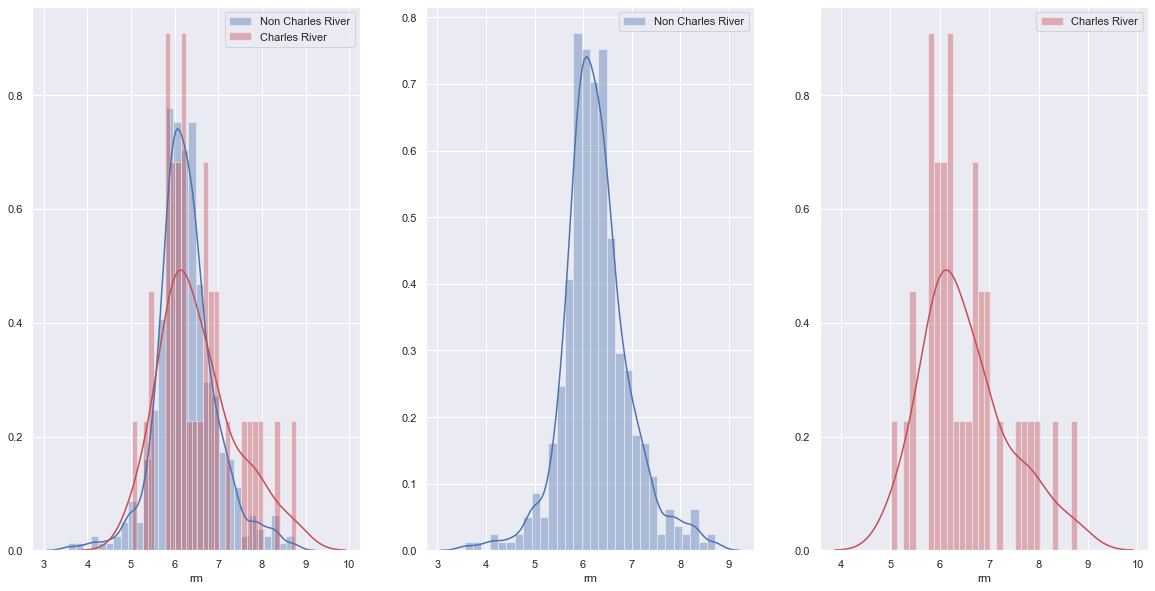

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['rm'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['rm'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['rm'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['rm'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

#plt.hist( NCR ["lstat"], label="Non Charles River")
#plt.hist( CR ["lstat"], label="Charles River")
#plt.legend()
#plt.show()

Similarly performing an ANOVA to compare houses on CR versus NCR based on Lower status of population 'LSTAT', we find the results are not conclusive in rejecting the null hypothesis, as the F-statistic is very low, and the p-value is a magnitude of 5 above the 5% threshold for rejecting the null hypothesis.

In [30]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]
stats.f_oneway(df['lstat'][df['chas'] == 0],df['lstat'][df['chas'] == 1])

F_onewayResult(statistic=1.4700936637073991, pvalue=0.22589895344450323)

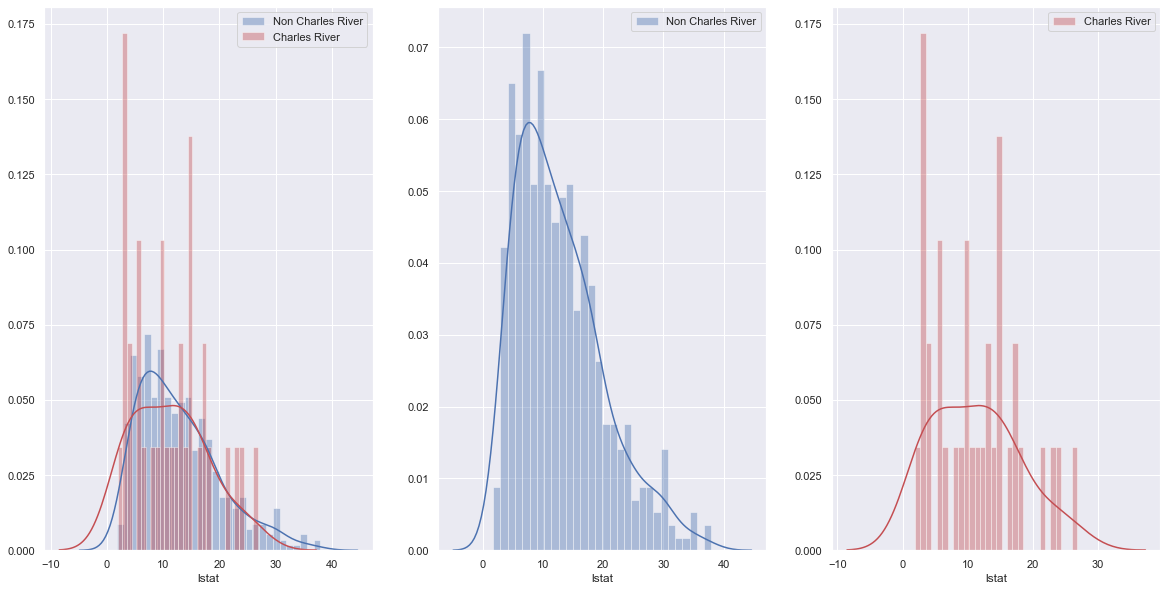

In [31]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['lstat'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['lstat'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['lstat'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['lstat'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

Finally, performing ANOVA to compare houses on CR versus NCR based on Student to teacher ratio 'PRATIO', the results better than the other feature variables, demonstrating a higher F-statistic and lower p-value than each of Number of rooms 'RM' and Lower status population 'LSTAT' but still a lower F-statistic and higher p-value respectively than for median house price 'MEDV'.

In [32]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]
stats.f_oneway(df['ptratio'][df['chas'] == 0],df['ptratio'][df['chas'] == 1])

F_onewayResult(statistic=7.55356797639744, pvalue=0.006203915968590273)

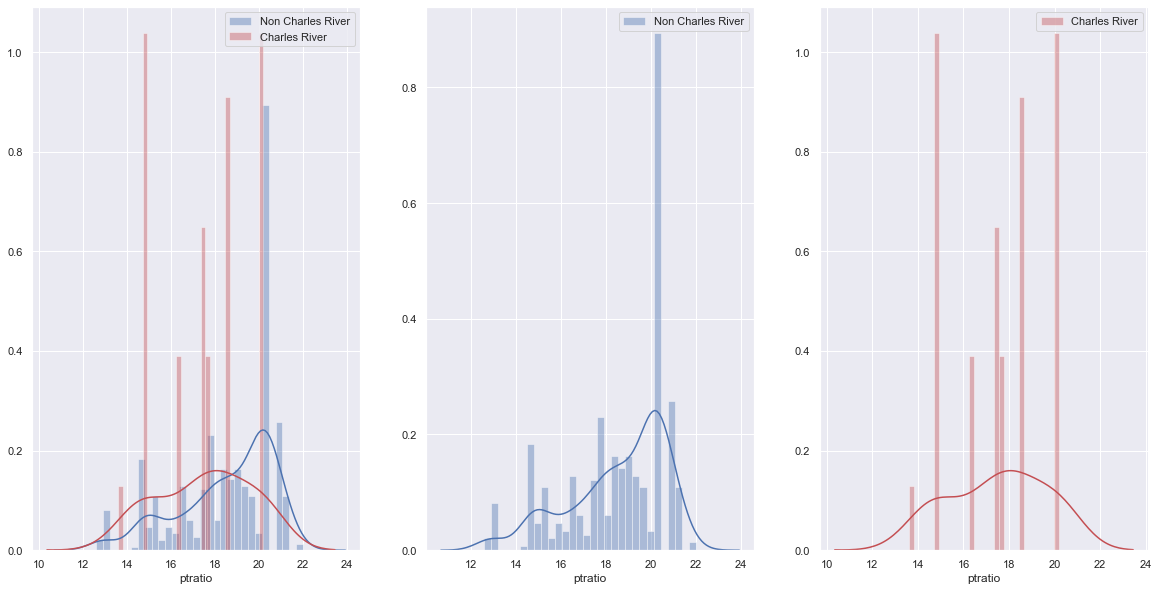

In [33]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
NCRCR = sns.distplot(NCR['ptratio'], bins=30, ax=ax[0], color="b", label=["Non Charles River"])
CRNCR = sns.distplot(CR['ptratio'], bins=30, ax=ax[0], color="r", label=["Charles River"])
NCR = sns.distplot(NCR['ptratio'], bins=30, ax=ax[1], color="b", label=["Non Charles River"])
CR = sns.distplot(CR['ptratio'], bins=30, ax=ax[2], color="r", label=["Charles River"])

#plt.hist( NCR ["medv"], label="Non Charles River")
#plt.hist( CR ["medv"], label="Charles River")
NCRCR.legend()
NCR.legend()
CR.legend()
plt.show()

# Section 3

## Creating & training a Neural Network

Based on the results of the previous sections we will create our neural netwok based on the input varibales RM, LSTAT and PRATIO. So we will begin by creating a dataframe of just these variables.

In [ ]:
#test adding columns to the dataset

#df["test"] = (df["tax"]*5).astype(np.int)
#df

In [79]:
#print out first 5 ages
output = df["medv"]
output.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [80]:
#assign initial inputs to the neural network - (Lstat, not Istat)
#Not including age
#inputs = df[["crim", "zn", "indus", "chas", "nox", "rm", "dis", "rad", "tax", "ptratio", "b","lstat","medv"]]
#inputs.head(5)

In [81]:
inputs = df[["rm","lstat","ptratio"]]
inputs.head(5)

,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


Next we will create our neural network using the Keras library. Having imported the Keras library we build our initial network and store it in our model, m as follows:

In [82]:
#Set up intial Neural Network
m = kr.models.Sequential()

Now that we have created our neural network we need to add layers to our model, m. The first layer will begin by taking in our input variables, and using the Dense function pass those variables through the layer, linearly as we have established linear relationships between the feature variables and the target variable, and provide 10 outputs to the next layer. The next layer will inturn take these outputs as inputs until our layers are exhausted and the final layer provides a single output.

The activation function is the means by when we will ultimately train our network. A neural network is trained using backpropagation which traces back from the output of the model to find the original weight applied by each neuron in order to find the optimal weight for each, thus amending or reverse engineering the weights of each neuron to deliver the most accurate output possible.

In [83]:
#3 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="linear")) #kernel_initializer="ones", bias_initializer="zeros"))
m.add(kr.layers.Dense(10, activation="linear")) #kernel_initializer="ones", bias_initializer="zeros"))                    
m.add(kr.layers.Dense(1, activation="linear"))

Next we compile the neural network and measure the success or failure of the model by mean squared error. The lower this mean squared error value the better, or more accurate our predictions are versus the target variable.  The optimizer is designed to minimize the error function as the network learns. We will trial several in the project and seek to settle on the optimizer that yields the lowest mean squared error.

In [84]:
m.compile(loss="mean_squared_error", optimizer="adam")

Now that our neural network has compiled and we have defined our optimizer function we can fit our inputs to our model and predict outputs. We simply need to define the batch size and the number of cycles through the full dataset for training. We will arbitrarily set this to 20 to give the neural network the chance to develop. 

In [91]:
m.fit(inputs, output, epochs=20, batch_size=10)

Epoch 1/20
506/506 [==============================] - 1s 1ms/step - loss: 20.4964
Epoch 2/20
506/506 [==============================] - 1s 1ms/step - loss: 21.7602: 0s -
Epoch 3/20
506/506 [==============================] - 1s 1ms/step - loss: 23.3947
Epoch 4/20
506/506 [==============================] - 1s 1ms/step - loss: 24.3318
Epoch 5/20
506/506 [==============================] - 1s 1ms/step - loss: 19.8708
Epoch 6/20
506/506 [==============================] - 1s 1ms/step - loss: 23.5938
Epoch 7/20
506/506 [==============================] - 1s 1ms/step - loss: 23.3576
Epoch 8/20
506/506 [==============================] - 1s 2ms/step - loss: 21.3354
Epoch 9/20
506/506 [==============================] - 1s 1ms/step - loss: 20.8726
Epoch 10/20
506/506 [==============================] - 1s 1ms/step - loss: 23.2616
Epoch 11/20
506/506 [==============================] - 1s 1ms/step - loss: 22.1753
Epoch 12/20
506/506 [==============================] - 1s 1ms/step - loss: 21.8325
Epoch 1

In [86]:
#Output is set to age
#Prediction of outputs, transpose & round to one decimal place.
#Don't expext any correlation - validated

np.around(m.predict(inputs).T,decimals=1)

array([[25.4, 24.4, 29.6, 30.8, 29.4, 28.1, 18.8, 14.4,  5.5, 15.5, 13.8,
        18.2, 16.2, 27. , 25.9, 26.6, 28.2, 22.5, 23.5, 24.4, 17.1, 23. ,
        19.9, 18.4, 21.2, 20.4, 22. , 20.7, 24.9, 25.8, 16.3, 23.8, 13.1,
        19.3, 18.7, 24.3, 22.9, 24.8, 24.1, 28.7, 31.2, 28.3, 26.4, 25.3,
        23.5, 22.2, 19.6, 16.8,  6.9, 17.8, 19.5, 22.7, 26.4, 23.1, 22.3,
        29.3, 26.3, 26.5, 27.2, 25.1, 21.9, 21.4, 27.9, 26.6, 27.3, 25.8,
        20.8, 25.1, 20.9, 24.6, 27.4, 24.2, 27.6, 26.5, 26.6, 25.1, 22.9,
        23.8, 22.6, 24.1, 28.9, 27.3, 27. , 26.2, 24.6, 27.3, 21.6, 24.9,
        28.2, 28.2, 24.6, 25. , 25.5, 26.4, 23.4, 26.8, 22.5, 31.5, 31.4,
        28.7, 27.7, 29. , 26.1, 23.6, 24.4, 20.8, 19.2, 23.1, 25.1, 22.3,
        24. , 24.3, 18.3, 18. , 23.1, 18.7, 21.8, 22.8, 18.8, 19.8, 20.7,
        21.1, 18.4, 12.8, 18.5, 20.7, 11. , 20.3, 23.1, 19.3, 25.1, 25.1,
        26. , 22.1, 20.3, 21.7, 21. , 23.7, 17.7, 20.3, 16.3,  6.6,  6.8,
         7.3,  4.1,  7.6, 14.6,  3.9, 

In [87]:
output.as_matrix()

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [88]:
#Now data is of same dimension
#output.as_matrix() - m.predict(inputs)

#One of them needs to be transposed (.T)
#output.as_matrix() - m.predict(inputs).T

#Sum up the squared losses & take SQRT (mean squared error)

np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


154.08464547899055

## Tune the neural network

In order to minimise the mean squared error of the result we must tune our network. In order to do this we must discover more about the different layers of neurons as well as empirically test different activation functions and optimizer functions. 

We can experiment with sigmoid, tanh and linear activation functions, and also optimizer functions such as stochastic gradient descent SGD and Adaptive Moment Estimation ADAM.

### Sigmoid activation function

Using the sigmoid activation function we can seek to replicate the normal distribution of the target variable. Visually, the sigmoid activation function mirrors the distribution of the target variable so is a good place to start. We can investigate the difference in using the SGD optimizer versus the ADAM optimizer.

#### ADAM optimizer function

Tuning the neural network with the sigmoid activation function and ADAM optimizer function yields the below result.


In [101]:
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="sigmoid")) #kernel_initializer="ones")) #bias_initializer="zeros"))
m.add(kr.layers.Dense(50, activation="sigmoid")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(50, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam") #optimizer updates weights after every iteration

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(inputs, output, epochs=100,batch_size=32)
#epochs too few limits potential of model, too many may over fit to the data. 
#batch size too low patterns less repeating, too high learning slows. Try powers of 2.

#Run each x value through the neural network
prediction = m.predict(inputs)




Epoch 1/100
506/506 [==============================] - 2s 4ms/step - loss: 513.7532
Epoch 2/100
506/506 [==============================] - 0s 314us/step - loss: 356.5759
Epoch 3/100
506/506 [==============================] - 0s 237us/step - loss: 221.1042
Epoch 4/100
506/506 [==============================] - 0s 156us/step - loss: 126.5778
Epoch 5/100
506/506 [==============================] - 0s 150us/step - loss: 86.6195
Epoch 6/100
506/506 [==============================] - 0s 142us/step - loss: 79.8645
Epoch 7/100
506/506 [==============================] - 0s 154us/step - loss: 76.5127
Epoch 8/100
506/506 [==============================] - 0s 180us/step - loss: 73.0817
Epoch 9/100
506/506 [==============================] - 0s 176us/step - loss: 69.4372
Epoch 10/100
506/506 [==============================] - ETA: 0s - loss: 71.31 - 0s 174us/step - loss: 64.8243
Epoch 11/100
506/506 [==============================] - 0s 168us/step - loss: 60.0099
Epoch 12/100
506/506 [===============

506/506 [==============================] - 0s 172us/step - loss: 19.5335
Epoch 96/100
506/506 [==============================] - 0s 176us/step - loss: 19.5427
Epoch 97/100
506/506 [==============================] - 0s 200us/step - loss: 19.3570
Epoch 98/100
506/506 [==============================] - 0s 741us/step - loss: 19.5148
Epoch 99/100
506/506 [==============================] - 0s 170us/step - loss: 19.3949
Epoch 100/100
506/506 [==============================] - 0s 142us/step - loss: 19.4063


Plotting the results of the predicted output versus the target variable we can see that the target variable is being approximated accurately by the visual test 

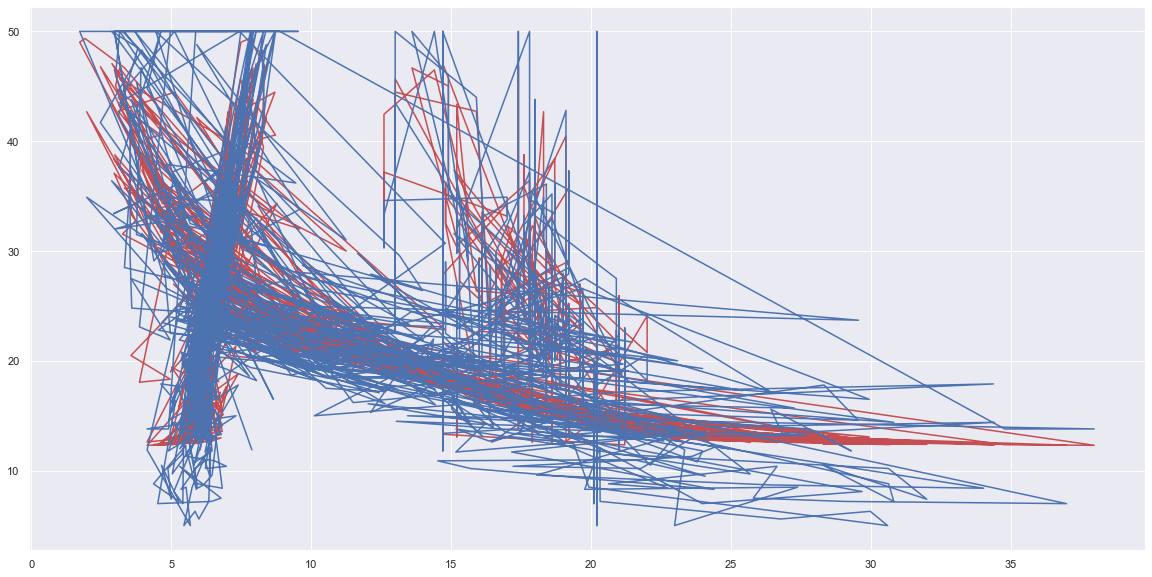

In [102]:
#Plot the values
#Just plotting p versus y in this instance
plt.plot(inputs, prediction, "r", label="Prediction")
plt.plot(inputs, output, "b", label="Original")


Validating our approximation by way of mean squared error is yields a positive result of 98.6 which is an excellent start coupled with our plot.

In [103]:
#mean squared error
np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


98.70861945201251

#### SGD optimizer function

Next lets tune the neural network with the sigmoid activation function and SGD optimizer function. 

In [104]:
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="sigmoid")) #kernel_initializer="ones")) #bias_initializer="zeros"))
m.add(kr.layers.Dense(50, activation="sigmoid")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(50, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="SGD") #optimizer updates weights after every iteration

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(inputs, output, epochs=100,batch_size=32)
#epochs too few limits potential of model, too many may over fit to the data. 
#batch size too low patterns less repeating, too high learning slows. Try powers of 2.

#Run each x value through the neural network
prediction = m.predict(inputs)

Epoch 1/100
506/506 [==============================] - 1s 2ms/step - loss: 258.0811
Epoch 2/100
506/506 [==============================] - 0s 113us/step - loss: 130.0657
Epoch 3/100
506/506 [==============================] - 0s 140us/step - loss: 104.5112
Epoch 4/100
506/506 [==============================] - 0s 128us/step - loss: 104.9061
Epoch 5/100
506/506 [==============================] - ETA: 0s - loss: 92.95 - 0s 180us/step - loss: 92.8666
Epoch 6/100
506/506 [==============================] - 0s 295us/step - loss: 90.5599
Epoch 7/100
506/506 [==============================] - 0s 208us/step - loss: 121.1942
Epoch 8/100
506/506 [==============================] - 0s 136us/step - loss: 81.4667
Epoch 9/100
506/506 [==============================] - 0s 140us/step - loss: 72.6758
Epoch 10/100
506/506 [==============================] - 0s 144us/step - loss: 70.7503
Epoch 11/100
506/506 [==============================] - 0s 158us/step - loss: 62.6797
Epoch 12/100
506/506 [==============

506/506 [==============================] - 0s 136us/step - loss: 33.5997
Epoch 96/100
506/506 [==============================] - 0s 142us/step - loss: 37.9518
Epoch 97/100
506/506 [==============================] - 0s 156us/step - loss: 34.7378
Epoch 98/100
506/506 [==============================] - 0s 184us/step - loss: 31.2720
Epoch 99/100
506/506 [==============================] - 0s 380us/step - loss: 34.4442
Epoch 100/100
506/506 [==============================] - 0s 150us/step - loss: 36.1980


We can see that introducing the SGD is less favourable than ADAM in terms of mean squared error versus target variable.

In [105]:
#mean squared error
np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


126.65271736800874

Plotting the results of the predicted output versus the target variable we can see that the target variable is being approximated accurately by the visual test 

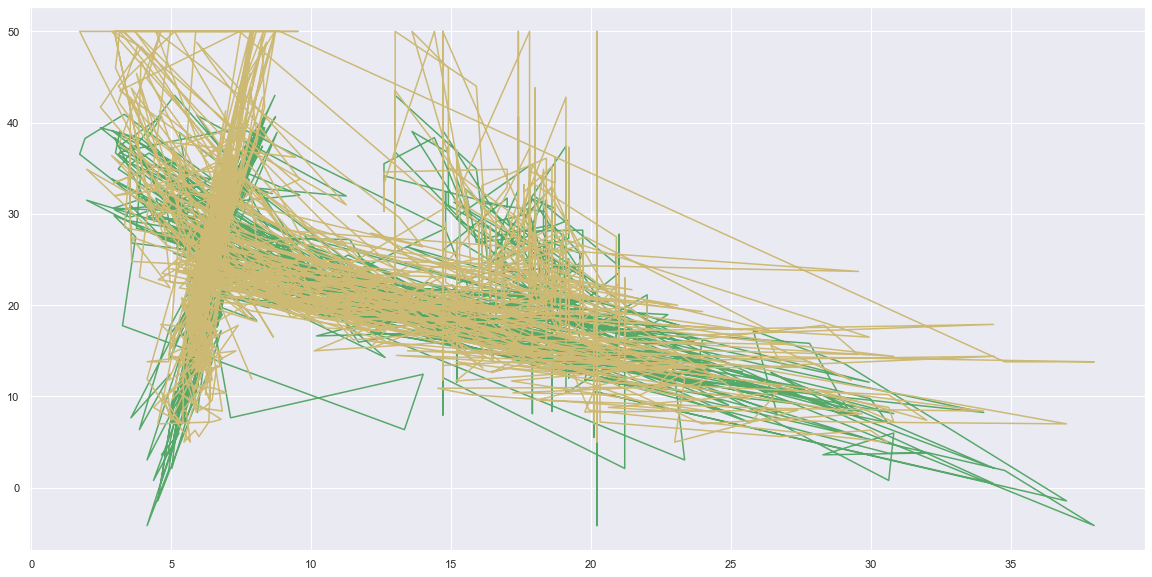

In [119]:
#Plot the values
#Just plotting p versus y in this instance
plt.plot(inputs, prediction, "g", label="Prediction")
plt.plot(inputs, output, "y", label="Original")


### Tanh activation function

Using the tanh activation function we can seek to replicate the normal distribution of the target variable. Visually, the tanh activation function follows a narrower distribution than that of the target variable. We can investigate the difference in using the SGD optimizer versus the ADAM optimizer.

#### ADAM optimizer function

Tuning the neural network with the tanh activation function and ADAM optimizer function yields the below result.


In [106]:
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="tanh")) #kernel_initializer="ones")) #bias_initializer="zeros"))
m.add(kr.layers.Dense(50, activation="tanh")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(50, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam") #optimizer updates weights after every iteration

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(inputs, output, epochs=100,batch_size=32)
#epochs too few limits potential of model, too many may over fit to the data. 
#batch size too low patterns less repeating, too high learning slows. Try powers of 2.

#Run each x value through the neural network
prediction = m.predict(inputs)


Epoch 1/100
506/506 [==============================] - 2s 4ms/step - loss: 500.6605
Epoch 2/100
506/506 [==============================] - 0s 168us/step - loss: 340.0577
Epoch 3/100
506/506 [==============================] - 0s 148us/step - loss: 167.4785
Epoch 4/100
506/506 [==============================] - 0s 144us/step - loss: 72.7190
Epoch 5/100
506/506 [==============================] - 0s 154us/step - loss: 61.3601
Epoch 6/100
506/506 [==============================] - 0s 146us/step - loss: 54.6804
Epoch 7/100
506/506 [==============================] - 0s 156us/step - loss: 51.1200
Epoch 8/100
506/506 [==============================] - 0s 172us/step - loss: 47.8005
Epoch 9/100
506/506 [==============================] - 0s 174us/step - loss: 45.1057
Epoch 10/100
506/506 [==============================] - 0s 156us/step - loss: 42.9106
Epoch 11/100
506/506 [==============================] - 0s 204us/step - loss: 41.3250
Epoch 12/100
506/506 [==============================] - 0s 397

506/506 [==============================] - 0s 208us/step - loss: 26.1922
Epoch 96/100
506/506 [==============================] - 0s 498us/step - loss: 26.1803
Epoch 97/100
506/506 [==============================] - 0s 162us/step - loss: 26.0179
Epoch 98/100
506/506 [==============================] - 0s 182us/step - loss: 25.8994
Epoch 99/100
506/506 [==============================] - 0s 192us/step - loss: 25.9851
Epoch 100/100
506/506 [==============================] - 0s 172us/step - loss: 26.2535


We can see that introducing the SGD was less favourable than ADAM in terms of mean squared error versus target variable. So we will continue only with ADAM.

In [107]:
#mean squared error
np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


113.95920898686346

Plotting the results of the predicted output versus the target variable we can see that the target variable is being approximated accurately by the visual test

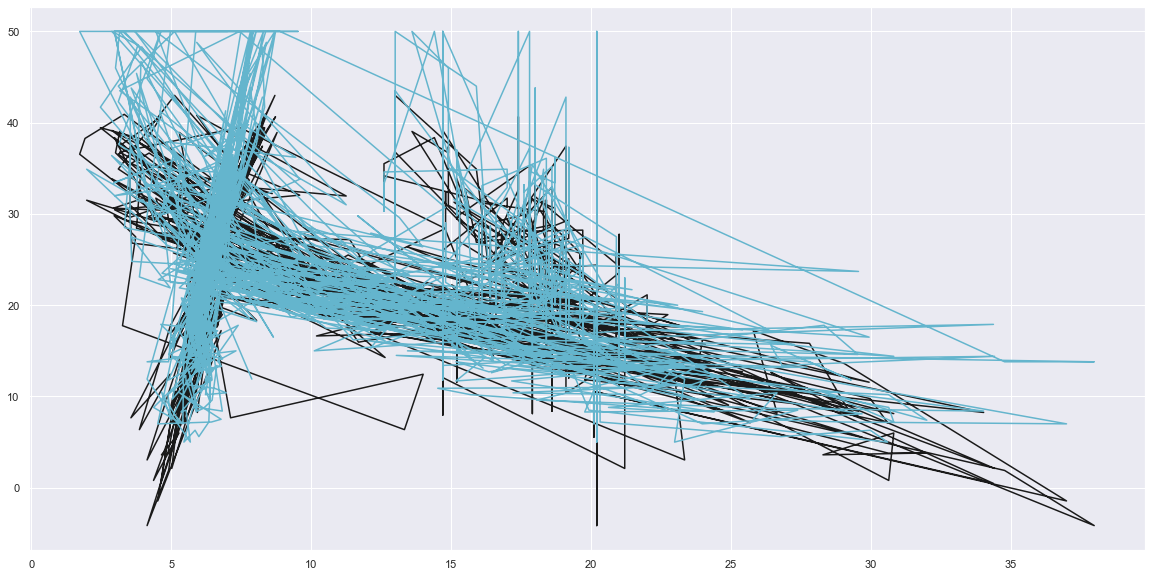

In [120]:
#Plot the values
#Just plotting p versus y in this instance
plt.plot(inputs, prediction, "k", label="Prediction")
plt.plot(inputs, output, "c", label="Original")

### Linear activation function

Next lets tune the neural network with the linear activation function and ADAM optimizer function. 

In [117]:
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=3, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))
m.add(kr.layers.Dense(50, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(50, activation="linear")) #kernel_initializer="ones")) #bias_initializer="zeros"))  
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam") #optimizer updates weights after every iteration

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(inputs, output, epochs=100,batch_size=32)
#epochs too few limits potential of model, too many may over fit to the data. 
#batch size too low patterns less repeating, too high learning slows. Try powers of 2.

#Run each x value through the neural network
prediction = m.predict(inputs)


Epoch 1/100
506/506 [==============================] - 2s 4ms/step - loss: 251.0215
Epoch 2/100
506/506 [==============================] - 0s 146us/step - loss: 77.5327
Epoch 3/100
506/506 [==============================] - 0s 160us/step - loss: 54.6717
Epoch 4/100
506/506 [==============================] - 0s 154us/step - loss: 50.3412
Epoch 5/100
506/506 [==============================] - 0s 154us/step - loss: 48.1110
Epoch 6/100
506/506 [==============================] - 0s 150us/step - loss: 46.3835
Epoch 7/100
506/506 [==============================] - 0s 150us/step - loss: 43.8897
Epoch 8/100
506/506 [==============================] - 0s 156us/step - loss: 42.0548
Epoch 9/100
506/506 [==============================] - 0s 208us/step - loss: 40.2365
Epoch 10/100
506/506 [==============================] - 0s 178us/step - loss: 38.1233
Epoch 11/100
506/506 [==============================] - 0s 172us/step - loss: 36.4228
Epoch 12/100
506/506 [==============================] - 0s 156us

506/506 [==============================] - 0s 212us/step - loss: 29.8740
Epoch 97/100
506/506 [==============================] - 0s 306us/step - loss: 31.2760
Epoch 98/100
506/506 [==============================] - 0s 186us/step - loss: 29.9238
Epoch 99/100
506/506 [==============================] - 0s 162us/step - loss: 29.4948
Epoch 100/100
506/506 [==============================] - 0s 164us/step - loss: 28.3240


In [118]:
#mean squared error
np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


119.92101562251125

## Conclusion

The neural network has been created using layers, trained using the activation function and tuned using the optimizer functions. The mean squared error of 98 is the best result which is a combination of the Sigmoid activation function and ADAM optimizer function.

The neural network fulfils the brief of predicting the median house price in Boston based on the three input feature variables identified and examined in sections 1 and 2.